##This script contains the following:
###1. Importing visualisation libraries and Data
###2. Exploring relationships:
-Correlations
-Scatterplots
-Pair plots
-Categorical plots

###1. Importing visualisation libraries and Data 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

#### Note about matplotlib:There are certain bugs associated with some versions of matplotlib. Before you start your analysis, you should check what version you have by typing `matplotlib.__version__` in a Jupyter cell and executing it. If it shows version 3.1.1, you'll likely experience some problems with the way the heatmap appears.
###To circumvent this, we recommend opening a new Anaconda terminal and executing this command: `conda update --all`. This will update all of your packages and install the newest version of matplotlib, where this bug has been fixed. \n",
###Then, restart the kernel for your notebook (so it can pick up any changes to your library versions) and rerun your code, which will re-import the libraries in your notebook. Check the version again, and you should have the latest version installed."

In [ ]:
matplotlib.__version__

In [2]:
# This option ensures the charts you create are displayed in the notebook without the need to \"call\" them specifically.\n",
%matplotlib inline

In [3]:
#import data:#reimporting data with a fix for reading the NAN values [dtype={'Indirect GHG Emissions (Metric Tons CO2e) ': pd.np.float64}, na_values=[' --'])] 
df=pd.read_csv(r'C:\Users\chloe\Documents\05.2023 project\02 Data\Prepared data\NYC_Energy_Water_Clean.csv', index_col = False)

C:\Users\Chloe\AppData\Local\Temp\ipykernel_7416\711803318.py:2: DtypeWarning: Columns (10,12,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(r'C:\Users\chloe\Documents\05.2023 project\02 Data\Prepared data\NYC_Energy_Water_Clean.csv', index_col = False)


cleaning and analysis

In [ ]:
#in order to rename columns, use the following syntax: df.rename(columns = ['old_name':'new_nme'}, in place = True])
df.rename(columns = {'Indirect GHG Emissions (Metric Tons CO2e)':'Indirect GHG Emissions per Metric Ton CO2e'}, inplace = True)
#in place=true means to overwrite the original column name with the new one

In [ ]:
#df_adj_wo = df_adj_wo.replace(['Not available'], ''), inplace=True
df['Indirect GHG Emissions per Metric Ton CO2e'] = df['Indirect GHG Emissions per Metric Ton CO2e'].replace(['Not available', '0.0'], '0')

In [ ]:
#check:
df['Indirect GHG Emissions per Metric Ton CO2e'].value_counts(dropna=False)

In [ ]:
df.dtypes

In [ ]:
#function for checking whether a datarame contains any mixed-type columns:
for col in df.columns.tolist():
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df[weird]) > 0:
    print (col)

In [5]:
#function for hiding from view unneccesary columns from the data
df_drop=df.drop(columns=['Weather Normalized Source EUI (kBtu/ft²)','Weather Normalized Site EUI (kBtu/ft²)','Weather Normalized Site Natural Gas Intensity (therms/ft²)'])

In [ ]:
#functionfor fnding missing values: df['variable'].value_counts(dropna = False)
df_drop.columns

In [ ]:
df_drop.shape

In [6]:
#consistency checks on df_drop dataframe
df_drop.describe()

,Unnamed: 0,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Occupancy,Source EUI (kBtu/ft²),Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Natural Gas Use (kBtu),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e)
count,37722.000000,3.772200e+04,37722.000000,37722.000000,37722.000000,37722.000000,37722.000000,3.772200e+04,3.772200e+04,3.772200e+04,3.772200e+04,3.772200e+04,3.772200e+04
mean,30393.905599,1.322764e+05,1948.562245,98.987859,361.780484,256.475383,11.534542,1.339353e+07,5.154258e+06,1.498879e+06,2.737816e+03,8.036879e+02,1.934127e+03
std,17161.525156,2.182681e+05,31.455833,6.439549,7846.856804,6966.641784,206.954175,6.877602e+08,6.629151e+07,1.931573e+07,6.949472e+04,3.653863e+04,5.910650e+04
min,0.000000,5.400000e+01,1649.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,-6.343300e+03,-1.859100e+03,0.000000e+00,0.000000e+00,-2.335860e+04
25%,15095.250000,5.590000e+04,1926.000000,100.000000,101.000000,64.500000,3.900000,9.487464e+05,8.794771e+05,2.545268e+05,2.808000e+02,1.463000e+02,7.690000e+01
50%,32337.500000,7.916550e+04,1940.000000,100.000000,126.100000,81.600000,5.300000,3.579012e+06,1.538366e+06,4.461023e+05,4.364000e+02,2.588000e+02,1.360000e+02
75%,45055.750000,1.326000e+05,1967.000000,100.000000,163.700000,102.400000,8.900000,6.216721e+06,3.522967e+06,1.020220e+06,7.618750e+02,4.234750e+02,3.216000e+02
max,58078.000000,1.421712e+07,2019.000000,100.000000,912801.100000,869265.000000,24369.500000,1.101676e+11,1.047620e+10,3.046183e+09,5.860677e+06,5.852949e+06,5.440262e+06


#all buildings are fully occupied, as shown in 'occupancy'
#there is a huge variation in the source of EUI, as shown by the large std. 
#some buildings have no electricity or natural gas use associated with them, some are creating their own electricity, shown by the minus figure for electricity use grid purchase.
#there are huge variations in Total GHG Emissions.

In [ ]:
#Run a check for missing values:
df_drop.isnull().sum()

In [ ]:
df_drop.shape

In [ ]:
df_drop.median()

#there is a much higher gas use than electricity use in the city.

In [ ]:
#save the clean data
df_drop.to_csv("C:/Users/chloe/Documents/02.2023 Instacart Basket Analysis/02 Data/Prepared Data/NY_checked.csv")

# Exploring Relationships: Correlations:

# Create a correlation matrix using pandas


In [7]:
df_drop.corr()

,Unnamed: 0,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Occupancy,Source EUI (kBtu/ft²),Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Natural Gas Use (kBtu),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e)
Unnamed: 0,1.000000,0.032244,0.037561,0.028396,0.016993,0.013983,0.018143,0.010908,0.012203,0.011840,0.012318,0.011357,0.007463
Largest Property Use Type - Gross Floor Area (ft²),0.032244,1.000000,0.116410,-0.024496,0.003499,0.003255,-0.002283,0.058279,0.129703,0.129598,0.097476,0.059824,0.077626
Year Built,0.037561,0.116410,1.000000,-0.009354,0.012348,0.012615,0.003884,0.015380,0.017647,0.017674,0.010016,0.014687,0.002697
Occupancy,0.028396,-0.024496,-0.009354,1.000000,-0.009070,-0.008908,-0.003739,-0.003653,-0.009339,-0.009358,-0.004054,-0.003430,-0.002646
Source EUI (kBtu/ft²),0.016993,0.003499,0.012348,-0.009070,1.000000,0.981869,0.337943,0.474264,0.245917,0.246068,0.473000,0.474109,0.263046
Site EUI (kBtu/ft²),0.013983,0.003255,0.012615,-0.008908,0.981869,1.000000,0.159678,0.508766,0.089685,0.089737,0.465451,0.508614,0.232839
Weather Normalized Site Electricity Intensity (kWh/ft²),0.018143,-0.002283,0.003884,-0.003739,0.337943,0.159678,1.000000,0.000027,0.856576,0.857138,0.069293,-0.000023,0.081486
Natural Gas Use (kBtu),0.010908,0.058279,0.015380,-0.003653,0.474264,0.508766,0.000027,1.000000,0.007088,0.007113,0.525969,0.999953,0.000256
Electricity Use - Grid Purchase (kBtu),0.012203,0.129703,0.017647,-0.009339,0.245917,0.089685,0.856576,0.007088,1.000000,0.999989,0.121003,0.007216,0.137809
Weather Normalized Site Electricity (kWh),0.011840,0.129598,0.017674,-0.009358,0.246068,0.089737,0.857138,0.007113,0.999989,1.000000,0.121091,0.007239,0.137898


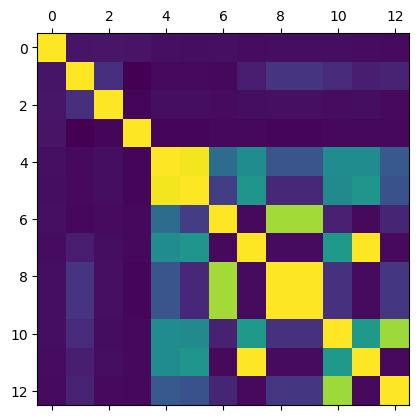

In [8]:
# Create a correlation heatmap using matplotlib
plt.matshow(df_drop.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

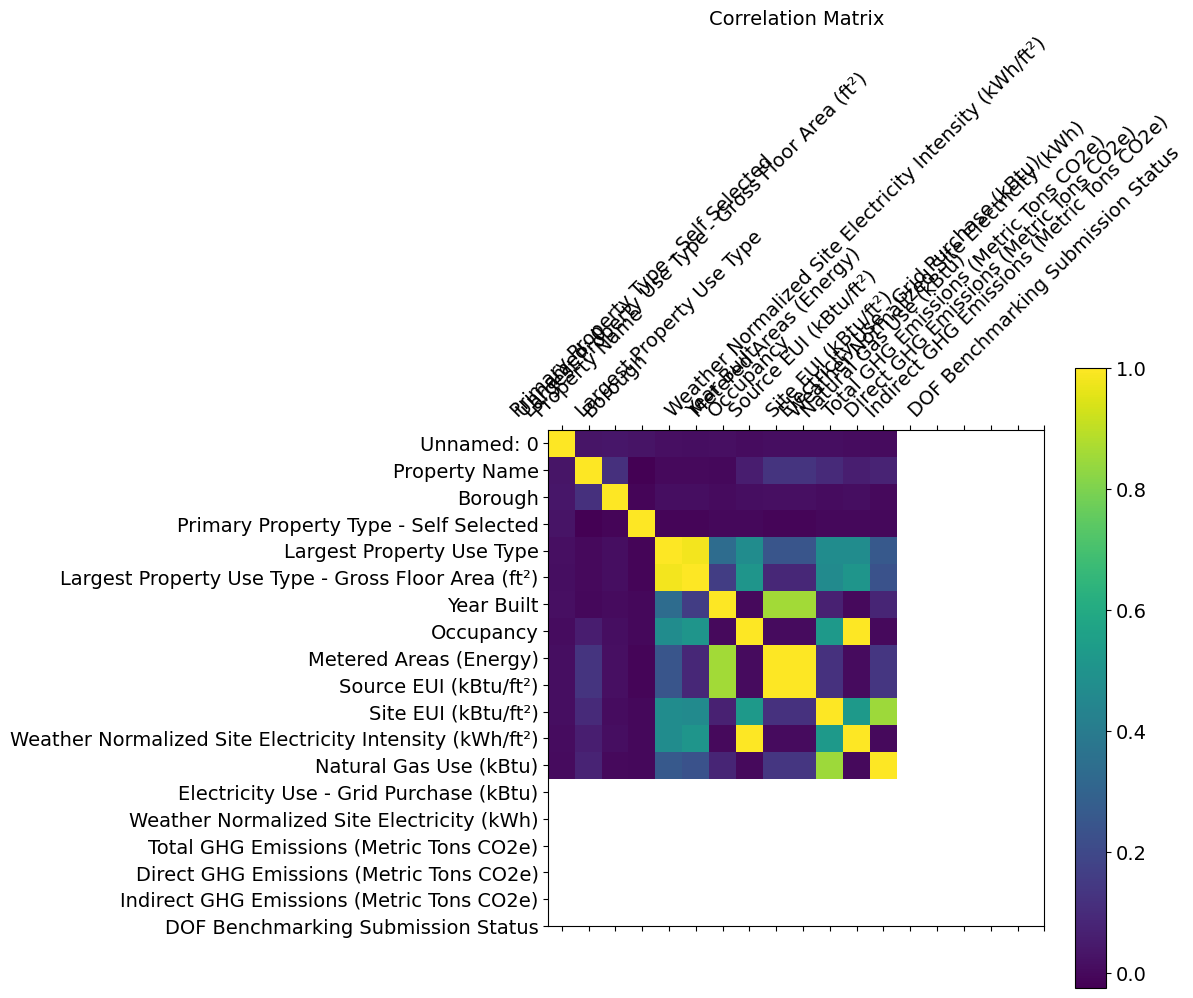

In [9]:
# Add labels, a legend, and change the size of the heatmap
f = plt.figure(figsize=(8, 8)) # figure size
plt.matshow(df_drop.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_drop.shape[1]), df_drop.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df_drop.shape[1]), df_drop.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

In [ ]:
# Save figure in the current working directory'cwd = os.getcwd()', 'cwd': ('C:\\Users\\Chloe\\Documents\\05.2023 project\\03 Scripts')
plt.matshow(df_drop.corr())
plt.savefig('corr.png')

#### Create a correlation heatmap using seaborn

In [ ]:
df_drop.columns

In [10]:
# Create a subset excluding the \"order\" and \"Largest Property Use Type\" columns
sub = df_drop[['Largest Property Use Type - Gross Floor Area (ft²)','Year Built', 'Occupancy','Source EUI (kBtu/ft²)', 'Site EUI (kBtu/ft²)', 'Electricity Use - Grid Purchase (kBtu)','Natural Gas Use (kBtu)','Direct GHG Emissions (Metric Tons CO2e)']]

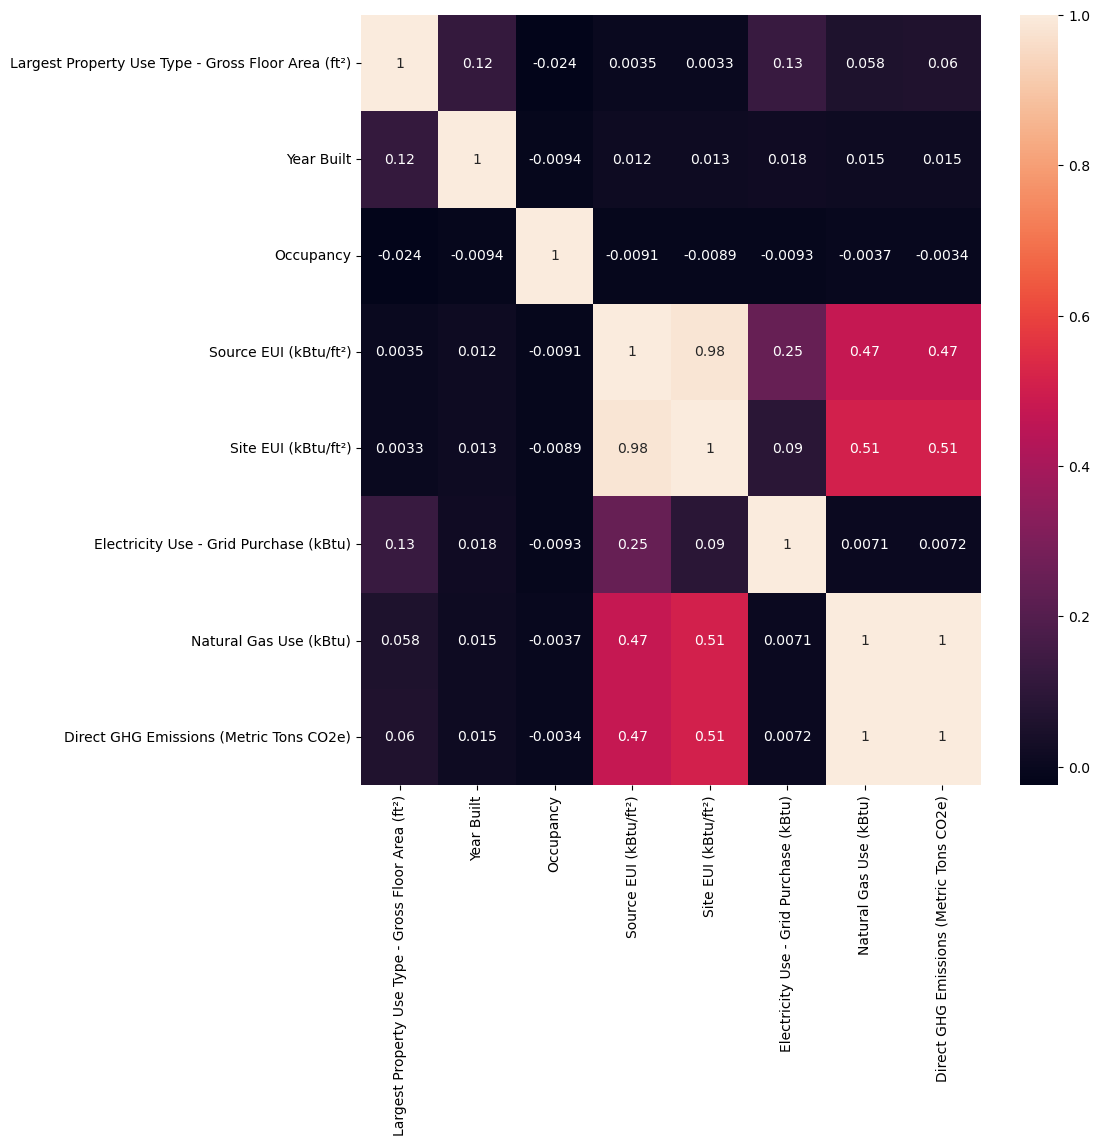

In [11]:
#Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))
# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to place the correlation coefficients onto the heatmap."

#### Scatterplots:

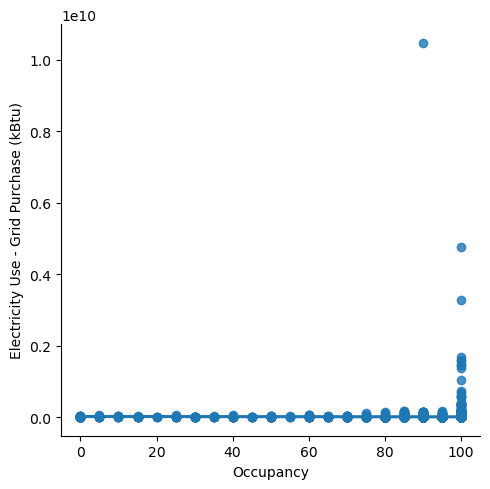

In [12]:
# Create a scatterplot for the \"Occupancy\" and \"Weather Normalized Site Electricity Intensity (kWh/ft²)" columns in seaborn\n",
sns.lmplot(x = 'Occupancy', y = 'Electricity Use - Grid Purchase (kBtu)', data = df_drop)

#This reflects the earlier observation that almost all of the buildings are fully occupied.  There is also an apparent outlier using very high amounts of electricity.

#### Pair Plots

In [13]:
# Keep only the variables you want to use in the pair plot
sub_2 = sub[['Direct GHG Emissions (Metric Tons CO2e)', 'Electricity Use - Grid Purchase (kBtu)', 'Site EUI (kBtu/ft²)', 'Natural Gas Use (kBtu)']]

In [ ]:
# Create a pair plot 
g = sns.pairplot(sub_2)

####There's a great variation in the city between buildings and their useage, but this is not related to level of occupancy, suggestingthe building fabric is more important than the energy usage of the people occupying them in determining overall levels of CO2. 
It would be useful to further explore whether or not there is a geographical distribution of lower-energy buildings around a specific area, or if useage of the building space has an influence  on the amount of CO2 used. eg a school uilding is closed for long periods (over Christmas and in the summer), so this should lower the overall energy outlay.

### Categorical Plots:
##### Creating a categorical variable that splits the \"Largest Property Use Type\" column into categories"

In [ ]:
# Use a histogram to visualize the distribution of the variables to determine sensible categories for the property use type
# You don't want to end up with too few observations in any one of the categories.\n",
# The argument \"kde\" adds a line that encompasses the distribution
sns.histplot(df_drop['Electricity Use - Grid Purchase (kBtu)'], bins = 200000, kde = True)"

In [ ]:
df_drop.loc[df_drop['Electricity Use - Grid Purchase (kBtu)'] < 200000, 'Electricity Use'] = 'Low electricity use'"

In [ ]:
df_drop.loc[(df_drop['Electricity Use - Grid Purchase (kBtu)'] >= 200000) & (df['Electricity Use - Grid Purchase (kBtu)'] < 500000), 'Electricity Use'] = 'Fair electricity use'"

In [ ]:
df_drop.loc[df_drop['Electricity Use - Grid Purchase (kBtu)'] >= 500000, 'Electricity Use'] = 'High electricity use'

In [ ]:
df_drop['Electricity Use'].value_counts(dropna = False)"

In [ ]:
df_drop.columns

In [ ]:
# Create a categorical plot in seaborn using the price categories created above
sns.set(style=\"ticks\")
g = sns.catplot(x=\"N. shops\", y=\"Price per unit\", hue=\"Price category\", data=df)"

In [ ]:
# fig =#Again, the image will be saved in the working directory
g.get_figure()
g.savefig(\"out.png\") \n",

In [ ]:
#What information can be gleaned about how to reduce energy in buildings in NY?
#How does energy useage differ between office spaces, schools and family units?
#How does energy reduction practice differ for office spaces or for family units?
#which outliers are there and what differs about these buildings?
